In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [4]:
Data=pd.read_csv("/content/netflix.csv")
Data.head()

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80


In [5]:
Data.shape

(1000, 7)

In [6]:
Data.isna().sum()

title                  0
rating                 0
ratingLevel           59
ratingDescription      0
release year           0
user rating score    395
user rating size       0
dtype: int64

In [7]:
Data.isnull().sum()

title                  0
rating                 0
ratingLevel           59
ratingDescription      0
release year           0
user rating score    395
user rating size       0
dtype: int64

In [27]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1000 non-null   object 
 1   rating             1000 non-null   object 
 2   ratingLevel        941 non-null    object 
 3   ratingDescription  1000 non-null   int64  
 4   release year       1000 non-null   int64  
 5   user rating score  1000 non-null   float64
 6   user rating size   1000 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 54.8+ KB


In [8]:
Data["user rating score"] = Data["user rating score"].dropna()

In [9]:
Data.head()

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80


In [11]:
mean_value=np.mean(Data["user rating score"])
print(mean_value)

84.09421487603306


In [12]:
Data["user rating score"].fillna(value=mean_value, inplace=True)

In [13]:
Data.head()

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.000000,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,84.094215,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.000000,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.000000,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.000000,80


In [14]:
Data["rating"].unique()

array(['PG-13', 'R', 'TV-14', 'TV-PG', 'TV-MA', 'TV-Y', 'NR', 'TV-Y7-FV',
       'UR', 'PG', 'TV-G', 'G', 'TV-Y7'], dtype=object)

In [16]:
Data.describe()

,ratingDescription,release year,user rating score,user rating size
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,67.36600,2010.335000,84.094215,80.783000
std,30.78561,8.877927,9.598529,0.973066
min,10.00000,1940.000000,55.000000,80.000000
25%,35.00000,2007.000000,83.000000,80.000000
50%,60.00000,2015.000000,84.094215,80.000000
75%,90.00000,2016.000000,91.000000,82.000000
max,124.00000,2017.000000,99.000000,82.000000


In [32]:
fig=px.bar(Data,x="title",y="user rating score",color="rating")
fig.show()

In [35]:
fig= px.scatter(Data,x="title",y="user rating score",color="rating")
fig.show()

Looking at the above bar plot we can say that 

The show 13 reasons why is the highest rated show

The show step dog is the lowest rated show

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



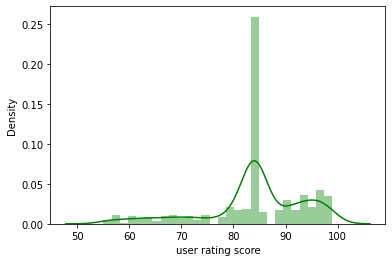

In [39]:
sns.distplot(Data["user rating score"],color="Green")
plt.show()

From the above plot we can say that the rating given to the shows are averaging at 85.0

In [43]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
Data["rating"]=le.fit_transform(Data["rating"])

In [44]:
Data.head()

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,3,"crude and sexual humor, language and some drug...",80,2004,99.0,80
1,Lucky Number Slevin,4,"strong violence, sexual content and adult lang...",100,2006,99.0,82
2,Grey's Anatomy,5,Parents strongly cautioned. May be unsuitable ...,90,2016,99.0,80
3,Prison Break,5,Parents strongly cautioned. May be unsuitable ...,90,2008,99.0,80
4,How I Met Your Mother,8,Parental guidance suggested. May not be suitab...,70,2014,99.0,80


In [55]:
Data.tail()

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
995,The BFG,2,"for action/peril, some scary moments and brief...",60,2016,56.0,80
996,The Secret Life of Pets,2,for action and some rude humor,60,2016,56.0,81
997,Precious Puppies,6,Suitable for all ages.,35,2003,56.0,82
998,Beary Tales,6,Suitable for all ages.,35,2013,55.0,82
999,Growing Up Wild,0,NaN,35,2016,55.0,80


In [56]:
Data["ratingLevel"].fillna(value="Parents strongly cautioned. May be unsuitable for children ages 14 and under.", inplace=True)

In [57]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1000 non-null   object 
 1   rating             1000 non-null   int64  
 2   ratingLevel        1000 non-null   object 
 3   ratingDescription  1000 non-null   int64  
 4   release year       1000 non-null   int64  
 5   user rating score  1000 non-null   float64
 6   user rating size   1000 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 54.8+ KB


In [60]:
# Apply first level cleaning
import re
import string

#This function converts to lower-case, removes square bracket, removes numbers and punctuation
def text_clean_1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

cleaned1 = lambda x: text_clean_1(x)

In [61]:
# Let's take a look at the updated text
Data['cleaned_ratinglevel'] = pd.DataFrame(Data.ratingLevel.apply(cleaned1))
Data.head(10)

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size,cleaned_ratinglevel
0,White Chicks,3,"crude and sexual humor, language and some drug...",80,2004,99.0,80,crude and sexual humor language and some drug ...
1,Lucky Number Slevin,4,"strong violence, sexual content and adult lang...",100,2006,99.0,82,strong violence sexual content and adult language
2,Grey's Anatomy,5,Parents strongly cautioned. May be unsuitable ...,90,2016,99.0,80,parents strongly cautioned may be unsuitable f...
3,Prison Break,5,Parents strongly cautioned. May be unsuitable ...,90,2008,99.0,80,parents strongly cautioned may be unsuitable f...
4,How I Met Your Mother,8,Parental guidance suggested. May not be suitab...,70,2014,99.0,80,parental guidance suggested may not be suitabl...
5,Supernatural,5,Parents strongly cautioned. May be unsuitable ...,90,2016,99.0,80,parents strongly cautioned may be unsuitable f...
6,Breaking Bad,7,For mature audiences. May not be suitable for...,110,2013,99.0,80,for mature audiences may not be suitable for ...
7,The Vampire Diaries,5,Parents strongly cautioned. May be unsuitable ...,90,2017,99.0,80,parents strongly cautioned may be unsuitable f...
8,The Walking Dead,7,For mature audiences. May not be suitable for...,110,2015,98.0,80,for mature audiences may not be suitable for ...
9,Pretty Little Liars,5,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80,parents strongly cautioned may be unsuitable f...


In [62]:
Data.drop(columns=["ratingLevel"])

,title,rating,ratingDescription,release year,user rating score,user rating size,cleaned_ratinglevel
0,White Chicks,3,80,2004,99.0,80,crude and sexual humor language and some drug ...
1,Lucky Number Slevin,4,100,2006,99.0,82,strong violence sexual content and adult language
2,Grey's Anatomy,5,90,2016,99.0,80,parents strongly cautioned may be unsuitable f...
3,Prison Break,5,90,2008,99.0,80,parents strongly cautioned may be unsuitable f...
4,How I Met Your Mother,8,70,2014,99.0,80,parental guidance suggested may not be suitabl...
...,...,...,...,...,...,...,...
995,The BFG,2,60,2016,56.0,80,for actionperil some scary moments and brief r...
996,The Secret Life of Pets,2,60,2016,56.0,81,for action and some rude humor
997,Precious Puppies,6,35,2003,56.0,82,suitable for all ages
998,Beary Tales,6,35,2013,55.0,82,suitable for all ages


In [64]:
df=pd.read_csv("/content/netflix.csv")
df.head()

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80


In [65]:
Data["New_Rating"]=df["rating"]

In [66]:
Data.head()

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size,cleaned_ratinglevel,New_Rating
0,White Chicks,3,"crude and sexual humor, language and some drug...",80,2004,99.0,80,crude and sexual humor language and some drug ...,PG-13
1,Lucky Number Slevin,4,"strong violence, sexual content and adult lang...",100,2006,99.0,82,strong violence sexual content and adult language,R
2,Grey's Anatomy,5,Parents strongly cautioned. May be unsuitable ...,90,2016,99.0,80,parents strongly cautioned may be unsuitable f...,TV-14
3,Prison Break,5,Parents strongly cautioned. May be unsuitable ...,90,2008,99.0,80,parents strongly cautioned may be unsuitable f...,TV-14
4,How I Met Your Mother,8,Parental guidance suggested. May not be suitab...,70,2014,99.0,80,parental guidance suggested may not be suitabl...,TV-PG


In [70]:
from sklearn.model_selection import train_test_split

Independent_var = Data.cleaned_ratinglevel
Dependent_var = Data.New_Rating

IV_train, IV_test, DV_train, DV_test = train_test_split(Independent_var, Dependent_var, test_size = 0.1, random_state = 225)

print('IV_train :', len(IV_train))
print('IV_test  :', len(IV_test))
print('DV_train :', len(DV_train))
print('DV_test  :', len(DV_test))

IV_train : 900
IV_test  : 100
DV_train : 900
DV_test  : 100


In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = "lbfgs")


from sklearn.pipeline import Pipeline

In [72]:
model = Pipeline([('vectorizer',tvec),('classifier',clf2)])

model.fit(IV_train, DV_train)


from sklearn.metrics import confusion_matrix

predictions = model.predict(IV_test)

confusion_matrix(predictions, DV_test)

array([[ 9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 15,  1,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  2,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0, 19,  0,  5,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  8,  0,  0,  0,  0],
       [ 0,  0,  4,  0,  0,  0,  0,  0,  6,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  5,  0,  0, 10,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  8,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3]])

In [73]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy : ", accuracy_score(predictions, DV_test))
print("Precision : ", precision_score(predictions, DV_test, average = 'weighted'))
print("Recall : ", recall_score(predictions, DV_test, average = 'weighted'))

Accuracy :  0.81
Precision :  0.9070776591829224
Recall :  0.81


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



In [74]:
example = ["crude and sexual humor language and some drug content"]
result = model.predict(example)

print(result)

['R']


In [77]:
Data.index.name="ShowID"
Data.head()

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size,cleaned_ratinglevel,New_Rating
ShowID,,,,,,,,,
0,White Chicks,3,"crude and sexual humor, language and some drug...",80,2004,99.0,80,crude and sexual humor language and some drug ...,PG-13
1,Lucky Number Slevin,4,"strong violence, sexual content and adult lang...",100,2006,99.0,82,strong violence sexual content and adult language,R
2,Grey's Anatomy,5,Parents strongly cautioned. May be unsuitable ...,90,2016,99.0,80,parents strongly cautioned may be unsuitable f...,TV-14
3,Prison Break,5,Parents strongly cautioned. May be unsuitable ...,90,2008,99.0,80,parents strongly cautioned may be unsuitable f...,TV-14
4,How I Met Your Mother,8,Parental guidance suggested. May not be suitab...,70,2014,99.0,80,parental guidance suggested may not be suitabl...,TV-PG


In [80]:
Data["user rating size"].unique()

array([80, 82, 81])

In [84]:
Data.head()

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size,cleaned_ratinglevel,New_Rating
ShowID,,,,,,,,,
0,White Chicks,3,"crude and sexual humor, language and some drug...",80,2004,99.0,80,crude and sexual humor language and some drug ...,PG-13
1,Lucky Number Slevin,4,"strong violence, sexual content and adult lang...",100,2006,99.0,82,strong violence sexual content and adult language,R
2,Grey's Anatomy,5,Parents strongly cautioned. May be unsuitable ...,90,2016,99.0,80,parents strongly cautioned may be unsuitable f...,TV-14
3,Prison Break,5,Parents strongly cautioned. May be unsuitable ...,90,2008,99.0,80,parents strongly cautioned may be unsuitable f...,TV-14
4,How I Met Your Mother,8,Parental guidance suggested. May not be suitab...,70,2014,99.0,80,parental guidance suggested may not be suitabl...,TV-PG


In [89]:
Show_Id=[]
for x in range(1,1001):
  Show_Id.append(x)
print(Show_Id)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [94]:
Data["Show_Id"]=Show_Id
Data.head

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size,cleaned_ratinglevel,New_Rating,Show_Id
ShowID,,,,,,,,,,
0,White Chicks,3,"crude and sexual humor, language and some drug...",80,2004,99.0,80,crude and sexual humor language and some drug ...,PG-13,1
1,Lucky Number Slevin,4,"strong violence, sexual content and adult lang...",100,2006,99.0,82,strong violence sexual content and adult language,R,2
2,Grey's Anatomy,5,Parents strongly cautioned. May be unsuitable ...,90,2016,99.0,80,parents strongly cautioned may be unsuitable f...,TV-14,3
3,Prison Break,5,Parents strongly cautioned. May be unsuitable ...,90,2008,99.0,80,parents strongly cautioned may be unsuitable f...,TV-14,4
4,How I Met Your Mother,8,Parental guidance suggested. May not be suitab...,70,2014,99.0,80,parental guidance suggested may not be suitabl...,TV-PG,5


In [135]:
Data.rating.unique()

array([ 3,  4,  5,  8,  7,  9,  1, 11, 12,  2,  6,  0, 10])

In [138]:
New_Data=Data.pivot(index="rating",columns="User_Id",values="user rating score")
New_Data.head()

User_Id,1,2,3,4,5,6,7,8,9,10,...,991,992,993,994,995,996,997,998,999,1000
rating,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,56.0,56.0,NaN,NaN,NaN,NaN,55.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,56.0,56.0,NaN,NaN,NaN
3,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
New_Data.fillna(0,inplace=True)
New_Data.head()

User_Id,1,2,3,4,5,6,7,8,9,10,...,991,992,993,994,995,996,997,998,999,1000
rating,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,56.0,56.0,0.0,0.0,0.0,0.0,55.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,56.0,56.0,0.0,0.0,0.0
3,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [140]:
csr_data = csr_matrix(New_Data.values)
New_Data.reset_index(inplace=True)

In [141]:
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [142]:
def get_show_recommendation(movie_name):
    n_movies_to_reccomend = 10
    movie_list = Data[Data['title'].str.contains(movie_name)]  
    if len(movie_list):        
        movie_idx= movie_list.iloc[0]['rating']
        movie_idx = New_Data[New_Data['rating'] == movie_idx].index[0]
        
        distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_reccomend+1)    
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),\
                               key=lambda x: x[1])[:0:-1]
        
        recommend_frame = []
        
        for val in rec_movie_indices:
            movie_idx = New_Data.iloc[val[0]]['rating']
            idx = Data[Data['rating'] == movie_idx].index
            recommend_frame.append({'Title':Data.iloc[idx]['title'].values[0],'Distance':val[1]})
        df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_reccomend+1))
        return df
    
    else:
        
        return "No movies found. Please check your input"

In [145]:
get_show_recommendation('Grey\'s Anatomy')

,Title,Distance
1,The 100,1.0
2,White Chicks,1.0
3,Zootopia,1.0
4,Breaking Bad,1.0
5,Hannah Montana: The Movie,1.0
6,Lottie Dottie Chicken,1.0
7,Dino Squad,1.0
8,Trollhunters,1.0
9,High School Musical 2,1.0
10,How I Met Your Mother,1.0


In [147]:
get_show_recommendation('Young Justice')

,Title,Distance
1,White Chicks,1.0
2,The 100,1.0
3,Lucky Number Slevin,1.0
4,Zootopia,1.0
5,Hannah Montana: The Movie,1.0
6,Lottie Dottie Chicken,1.0
7,Dino Squad,1.0
8,Trollhunters,1.0
9,High School Musical 2,1.0
10,Breaking Bad,1.0
